In [35]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definisanje fuzzy ulaza
# Udaljenost od prepreke
distance_to_obstacle = ctrl.Antecedent(np.arange(0, 101, 1), 'distance_to_obstacle')
# Ugao između UAV-a i prepreke
angle_to_obstacle = ctrl.Antecedent(np.arange(-180, 181, 1), 'angle_to_obstacle')

# Definisanje fuzzy izlaza
# Promena brzine
speed_change = ctrl.Consequent(np.arange(-100, 101, 1), 'speed_change')
# Promena ugla pravca
heading_change = ctrl.Consequent(np.arange(-45, 46, 1), 'heading_change')

# Definisanje funkcija pripadnosti za udaljenost do prepreke
distance_to_obstacle['close'] = fuzz.trimf(distance_to_obstacle.universe, [0, 0, 30])
distance_to_obstacle['medium'] = fuzz.trimf(distance_to_obstacle.universe, [20, 50, 80])
distance_to_obstacle['far'] = fuzz.trimf(distance_to_obstacle.universe, [50, 100, 100])
distance_to_obstacle['very_far'] = fuzz.trimf(distance_to_obstacle.universe, [80, 100, 100])

# Definisanje funkcija pripadnosti za ugao između UAV-a i prepreke
angle_to_obstacle['neg_big'] = fuzz.trimf(angle_to_obstacle.universe, [-180, -180, -120])
angle_to_obstacle['neg_med'] = fuzz.trimf(angle_to_obstacle.universe, [-120, -90, -30])
angle_to_obstacle['neg_small'] = fuzz.trimf(angle_to_obstacle.universe, [-30, -10, 0])
angle_to_obstacle['pos_small'] = fuzz.trimf(angle_to_obstacle.universe, [0, 10, 30])
angle_to_obstacle['pos_med'] = fuzz.trimf(angle_to_obstacle.universe, [30, 90, 120])
angle_to_obstacle['pos_big'] = fuzz.trimf(angle_to_obstacle.universe, [120, 180, 180])

# Definisanje funkcija pripadnosti za promenu brzine (Speed Change)
speed_change['very_slow'] = fuzz.trimf(speed_change.universe, [-100, -100, -50])
speed_change['slow'] = fuzz.trimf(speed_change.universe, [-50, 0, 50])
speed_change['fast'] = fuzz.trimf(speed_change.universe, [50, 100, 100])
speed_change['very_fast'] = fuzz.trimf(speed_change.universe, [75, 100, 100])

# Definisanje funkcija pripadnosti za promenu ugla pravca (Heading Change)
heading_change['neg_big'] = fuzz.trimf(heading_change.universe, [-45, -45, -15])
heading_change['neg_med'] = fuzz.trimf(heading_change.universe, [-15, -10, 0])
heading_change['neg_small'] = fuzz.trimf(heading_change.universe, [-5, 0, 0])
heading_change['zero'] = fuzz.trimf(heading_change.universe, [-1, 0, 1])
heading_change['pos_small'] = fuzz.trimf(heading_change.universe, [0, 5, 15])
heading_change['pos_med'] = fuzz.trimf(heading_change.universe, [10, 15, 45])
heading_change['pos_big'] = fuzz.trimf(heading_change.universe, [15, 45, 45])

# Pravila fuzzy sistema
rule11 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_med'], 
                   (speed_change['very_fast'], heading_change['zero']))
rule12 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_small'], 
                   (speed_change['fast'], heading_change['neg_small']))
rule13 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_small'], 
                   (speed_change['fast'], heading_change['pos_small']))
rule14 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_med'], 
                   (speed_change['very_fast'], heading_change['zero']))
rule15 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['pos_big'], 
                   (speed_change['fast'], heading_change['zero']))

rule16 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['pos_med'], 
                   (speed_change['slow'], heading_change['neg_small']))
rule17 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['pos_small'], 
                   (speed_change['slow'], heading_change['neg_med']))
rule18 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['neg_small'], 
                   (speed_change['slow'], heading_change['pos_med']))
rule19 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['neg_med'], 
                   (speed_change['slow'], heading_change['pos_small']))

rule20 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['pos_big'], 
                   (speed_change['slow'], heading_change['neg_small']))
rule21 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['pos_med'], 
                   (speed_change['very_slow'], heading_change['neg_med']))
rule22 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['pos_small'], 
                   (speed_change['very_slow'], heading_change['neg_big']))
rule23 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['neg_small'], 
                   (speed_change['very_slow'], heading_change['pos_big']))
rule24 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['neg_med'], 
                   (speed_change['very_slow'], heading_change['pos_med']))
rule25 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['neg_big'], 
                   (speed_change['slow'], heading_change['pos_small']))

# Kreiranje fuzzy sistema
uav_ctrl = ctrl.ControlSystem([rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
uav_simulation = ctrl.ControlSystemSimulation(uav_ctrl)

# Primer ulaza
uav_simulation.input['distance_to_obstacle'] = 35  # udaljenost do prepreke (blizu)
uav_simulation.input['angle_to_obstacle'] = 45     # ugao u odnosu na prepreku

# Izvršavanje fuzzy sistema
uav_simulation.compute()

# Ispis rezultata simulacije
print(f"Predložena promena brzine: {uav_simulation.output['speed_change']:.2f}")
print(f"Predložena promena ugla pravca: {uav_simulation.output['heading_change']:.2f}")


Predložena promena brzine: -0.00
Predložena promena ugla pravca: -1.76


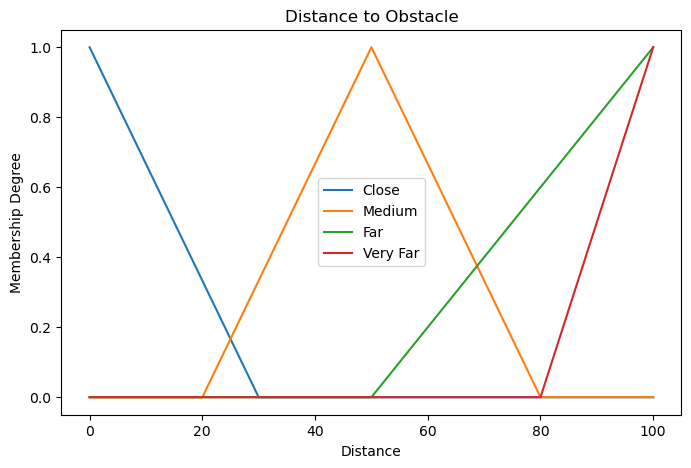

In [36]:
# Distance to Obstacle
plt.figure(figsize=(8, 5))

# Plotting the membership functions for Distance to Obstacle without using view()
plt.plot(distance_to_obstacle.universe, fuzz.trimf(distance_to_obstacle.universe, [0, 0, 30]), label='Close')
plt.plot(distance_to_obstacle.universe, fuzz.trimf(distance_to_obstacle.universe, [20, 50, 80]), label='Medium')
plt.plot(distance_to_obstacle.universe, fuzz.trimf(distance_to_obstacle.universe, [50, 100, 100]), label='Far')
plt.plot(distance_to_obstacle.universe, fuzz.trimf(distance_to_obstacle.universe, [80, 100, 100]), label='Very Far')

plt.title('Distance to Obstacle')
plt.xlabel('Distance')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

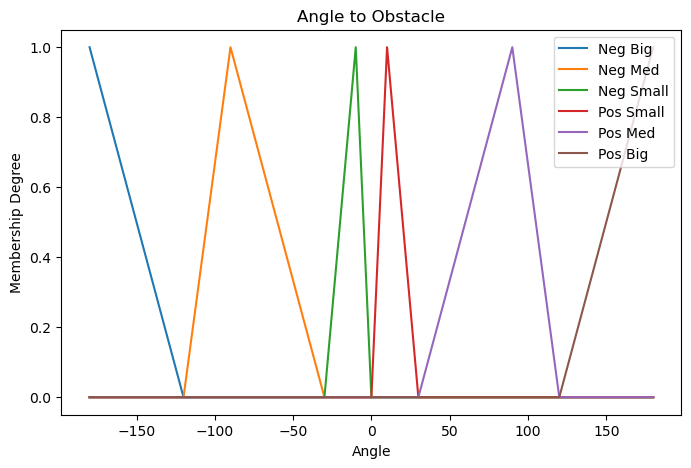

In [37]:
# Angle to Obstacle
plt.figure(figsize=(8, 5))

plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [-180, -180, -120]), label='Neg Big')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [-120, -90, -30]), label='Neg Med')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [-30, -10, 0]), label='Neg Small')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [0, 10, 30]), label='Pos Small')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [30, 90, 120]), label='Pos Med')
plt.plot(angle_to_obstacle.universe, fuzz.trimf(angle_to_obstacle.universe, [120, 180, 180]), label='Pos Big')

plt.title('Angle to Obstacle')
plt.xlabel('Angle')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

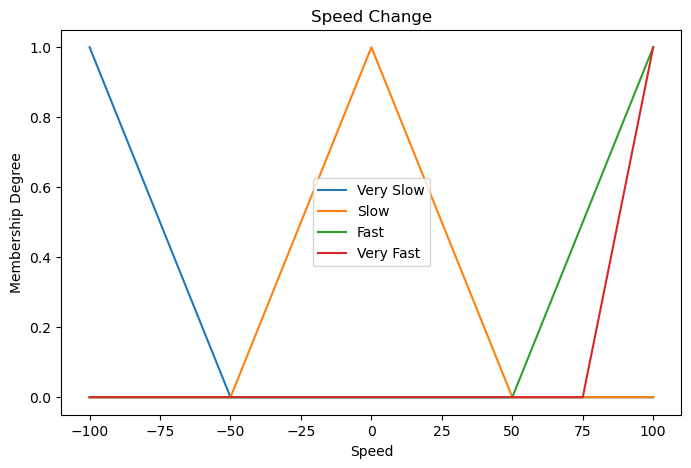

In [38]:
plt.figure(figsize=(8, 5))

plt.plot(speed_change.universe, speed_change['very_slow'].mf, label='Very Slow')
plt.plot(speed_change.universe, speed_change['slow'].mf, label='Slow')
plt.plot(speed_change.universe, speed_change['fast'].mf, label='Fast')
plt.plot(speed_change.universe, speed_change['very_fast'].mf, label='Very Fast')

plt.title('Speed Change')
plt.xlabel('Speed')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

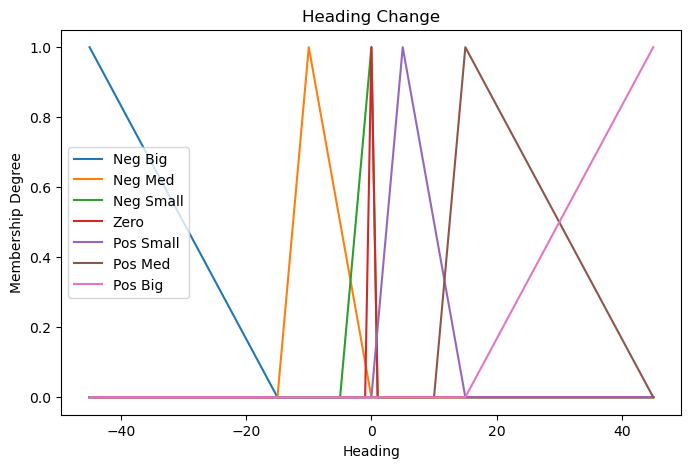

In [39]:
plt.figure(figsize=(8, 5))

plt.plot(heading_change.universe, heading_change['neg_big'].mf, label='Neg Big')
plt.plot(heading_change.universe, heading_change['neg_med'].mf, label='Neg Med')
plt.plot(heading_change.universe, heading_change['neg_small'].mf, label='Neg Small')
plt.plot(heading_change.universe, heading_change['zero'].mf, label='Zero')
plt.plot(heading_change.universe, heading_change['pos_small'].mf, label='Pos Small')
plt.plot(heading_change.universe, heading_change['pos_med'].mf, label='Pos Med')
plt.plot(heading_change.universe, heading_change['pos_big'].mf, label='Pos Big')

plt.title('Heading Change')
plt.xlabel('Heading')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Inicijalna pozicija i pravac letelice
x_pos = [0]  # X koordinata letelice
y_pos = [0]  # Y koordinata letelice
angle = [0]  # Početni pravac letelice (u stepenima)

# Parametri simulacije
num_steps = 50  # Broj koraka simulacije
obstacle_position = (20, 20)  # Pozicija prepreke (x, y)

# Funkcija za ažuriranje pozicije letelice na osnovu brzine i pravca
def update_position(x, y, angle, speed_change, heading_change, scale_factor=1):
    # Promeni ugao pravca
    new_angle = angle + heading_change
    
    # Konverzija ugla u radijane
    rad_angle = np.radians(new_angle)
    
    # Ažuriranje pozicije na osnovu skalirane brzine
    new_x = x + np.cos(rad_angle) * (speed_change * scale_factor)
    new_y = y + np.sin(rad_angle) * (speed_change * scale_factor)
    
    return new_x, new_y, new_angle


# Simulacija kretanja
for step in range(num_steps):
    # Udaljenost od prepreke
    distance_to_obstacle_value = np.sqrt((obstacle_position[0] - x_pos[-1])**2 + (obstacle_position[1] - y_pos[-1])**2)
    
    # Ugao u odnosu na prepreku
    angle_to_obstacle_value = np.degrees(np.arctan2(obstacle_position[1] - y_pos[-1], obstacle_position[0] - x_pos[-1])) - angle[-1]
    
    # Ograničavanje ugla između -180 i 180
    if angle_to_obstacle_value > 180:
        angle_to_obstacle_value -= 360
    elif angle_to_obstacle_value < -180:
        angle_to_obstacle_value += 360
    
    # Unesi vrednosti u fuzzy sistem
    uav_simulation.input['distance_to_obstacle'] = distance_to_obstacle_value
    uav_simulation.input['angle_to_obstacle'] = angle_to_obstacle_value
    
    # Izvrši fuzzy sistem
    uav_simulation.compute()
    
    # Dohvati izlaze iz fuzzy sistema
    speed_change_value = uav_simulation.output['speed_change']
    heading_change_value = uav_simulation.output['heading_change']
    # Ažuriraj poziciju letelice
    new_x, new_y, new_angle = update_position(x_pos[-1], y_pos[-1], angle[-1], speed_change_value, heading_change_value, scale_factor=10)    
    # Sačuvaj novu poziciju i pravac
    x_pos.append(new_x)
    y_pos.append(new_y)
    angle.append(new_angle)

# Iscrtavanje putanje letelice
plt.figure(figsize=(8, 8))
plt.plot(x_pos, y_pos, label='UAV Path')
plt.scatter(obstacle_position[0], obstacle_position[1], color='red', label='Obstacle')
plt.title('UAV Path Avoiding Obstacle')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'speed_change'